In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Generate Erdos Renyi Network

In [2]:
# Returns an Erdos-Renye network graph in an adjacency matrix format.
def ErdosRenye (N, K):
    adj_matrix = np.zeros((N,N))
    e = 0
    while e<K:
        a,b = (random.randint(0,N-1), random.randint(0,N-1))
        while adj_matrix[a][b] != 0:
            a,b = (random.randint(0,N-1), random.randint(0,N-1))
        adj_matrix[a][b] = 1
        e+=1
    return adj_matrix


In [3]:
N = 10000
K = 20000
random_graph = ErdosRenye(N,K)
degree_distribution = random_graph.sum(axis = 1) + (np.diag(np.ones(N)) * random_graph).sum(axis = 1)
# Self loops are counted as 2 degrees

### Degree Distribution

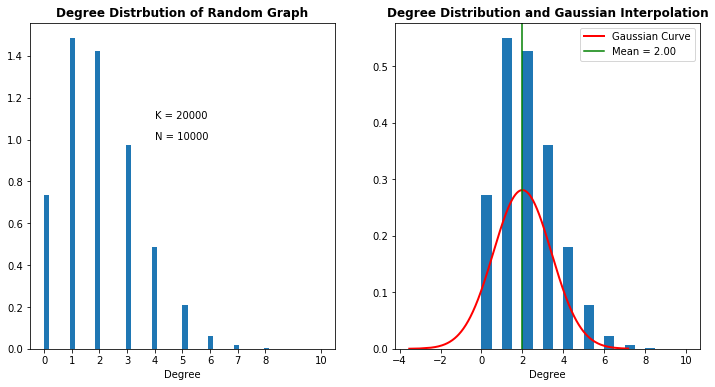

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Histogram of the degree distribution
ax1.hist(degree_distribution, density = True, bins = 'auto', )
ax1.set_xlabel('Degree')
ax1.set_title('Degree Distrbution of Random Graph', fontweight='bold')
ax1.set_xticks(np.unique(degree_distribution))
ax1.text(4, 1,'N = %i'%(N))
ax1.text(4, 1.1,'K = %i'%(K))


# Generating the guassian distribution of the degree ditribution
mu = degree_distribution.mean()
sigma = (np.var(degree_distribution))**(1/2.0)
x = np.random.normal(mu,sigma,10000) 
x = np.sort(x)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

ax2.hist(degree_distribution, bins= 20, density=True)
ax2.plot(x, y, linewidth=2, color='r', label = "Gaussian Curve")
ax2.axvline(mu,color='g',label= 'Mean = %.2f'%(mu))
ax2.set_title("Degree Distribution and Gaussian Interpolation", fontweight='bold')
ax2.set_xlabel('Degree')
ax2.legend()

fig.show()

### References

https://stackoverflow.com/questions/39675085/generating-normal-distribution-in-order-python-numpy.
https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html.
https://stackoverflow.com/questions/51012793/python-generate-normal-distribution-in-the-order-of-the-bell.
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html.
